## Introduction

So far we've used neural networks as a black box, with [scikit-learn](https://thedatafrog.com/handwritten-digit-recognition-scikit-learn/) and with [keras](https://thedatafrog.com/first-neural-network-keras/). Today, we're opening the box. 

To keep it easy, we'll do it for a very, very simple neural network, with a single neuron. 

Not very clever you might think, but this type of neural networks is actually used very often in machine learning problems, and is called a **logistic regression**. 

In this post, you will learn: 

* what's inside a neuron, and in particular what is the **sigmoid activation function**;
* that a neural network is nothing more than a function of its inputs;
* that neural networks with a single neuron do work, and are equivalent to a logistic regression.

**Prerequisites:**

A little bit of background in maths is needed to understand this post. You need to know:

* what is a function
* the exponential function

On the technical side, you need to 

* [install Anaconda](https://thedatafrog.com/install-anaconda-data-science-python/), if not already done.
* know a bit of numpy, matplotlib, and scikit-learn. For an introduction, you can check out [this tutorial](https://thedatafrog.com/handwritten-digit-recognition-scikit-learn/).

As usual, first download and open this notebook:

* [download the repository containing this notebook](https://github.com/cbernet/maldives/archive/master.zip)
* unzip it, say to `Downloads/maldives-master`
* launch a jupyter notebook from the anaconda navigator
* in the notebook, navigate to `Downloads/maldives-master/one_neuron`
* open `logistic_regression_1d.ipynb`

In the notebook, import the needed packages:

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset creation

Let's create a sample of examples with one variable $x$, in two categories.
For each category, the samples will be distributed according to a **Gaussian probability density function (pdf)**, which is also called the **normal** probability density function. This function looks like this:  

Text(0,0.5,'pdf')

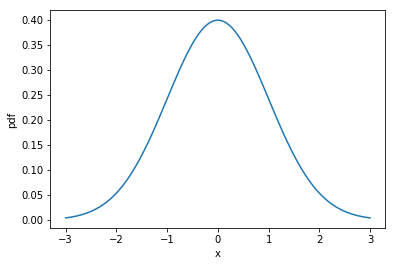

In [3]:
from scipy.stats import norm
x = np.linspace(-3,3, 100)
# the mean of the Gaussian is set to 0.
# (the Gaussian is centred on 0.)
# the width of the Gaussian sigma is set to 1.
plt.plot(x, norm.pdf(x, 0., 1.))
plt.xlabel('x'); plt.ylabel('pdf')

In this example, $x$ is a **random variable** distributed according to this Gaussian probability density function. 
This means that when we draw at random a value for $x$, the area under the curve for a given range in $x$ gives the probability for the value to fall in this range. And it follows that the full area under the function (its integral) between minus infinity and infinity is equal to 1. We can see that the values drawn for $x$ will have a high probability to fall around 0. 

For category 1, we choose a Gaussian probability density centered on -1.5 with unit standard deviation. For category 2, we center the Gaussian on 1.5 . In each category, we build 100 examples by drawing 100 values:

In [4]:
normal = np.random.normal
sigma = 1
x0 = normal(-1.5, sigma, 100)
x1 = normal(1.5, sigma, 100)
# labels: 
y0 = np.zeros_like(x0)
y1 = np.ones_like(x1)

These two samples can be visualized as a scatter plot, with the category on the y axis:

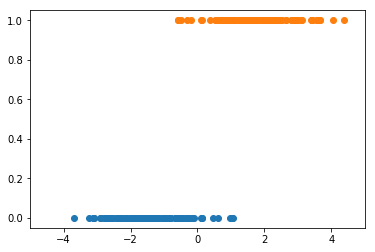

In [5]:
plt.xlim(-5,5)
plt.plot(x0, y0,'o')
plt.plot(x1, y1,'o')

And we can also show histograms. For each category, the histogram has 50 bins, that count the number of examples with a value falling in the bin:

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 3., 1., 1., 2., 1., 2., 6., 8., 5., 9., 8., 8.,
        7., 6., 8., 3., 3., 6., 3., 1., 4., 3., 0., 1., 1., 0., 0., 0.]),
 array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
        -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
        -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
         1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
         3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 50 Patch objects>)

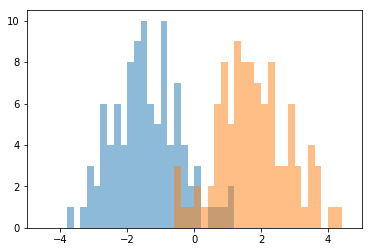

In [6]:
# plt.hist(sample1,bins=50, range=(-5,5))
plt.clf()
plt.xlim(-5,5)
plt.hist(x0,bins=50, range=(-5,5), alpha=0.5)
plt.hist(x1,bins=50, range=(-5,5), alpha=0.5)

The two samples indeed seem to follow the normal distributions we have chosen. With a larger number of samples in each category, each of the two histograms would come closer to their underlying normal distribution.  

By eye, we see that examples from the two samples can be classified by setting a separation boundary at $x=0$. Given an unknown sample, if $x>0$ we classify it to category 1, and to category 0 otherwise.

We are now going to see how the most simple neural network can find the boundary for us. 

But first, we must talk about the sigmoid function. 

## The sigmoid function 

The sigmoid or logistic function is essential in classification problems. In 1D, the **sigmoid** function is expressed as

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

and here is what it looks like, together with our samples. 

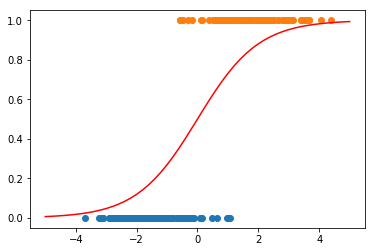

In [7]:
# define parameters
b = 0
w = 1

def sigmoid(x1):
    # z is a linear function of x1
    z = w*x1 + b
    return 1 / (1+np.exp(-z))

# create an array of evenly spaced values
linx = np.linspace(-5,5,51)
plt.plot(x0, np.zeros_like(x0),'o')
plt.plot(x1, np.ones_like(x1),'o')
plt.plot(linx, sigmoid(linx), color='red')

Let's look at this function in more details:

* when $z$ goes to infinity, $e^{-z}$ goes to zero, and $\sigma (z)$ goes to one.
* when $z$ goes to minus infinity, $e^{-z}$ goes to infinity, and $\sigma (z)$ goes to zero.
* $\sigma(0) = 0.5$, since $e^0=1$.

It is important to note that the sigmoid is bound between 0 and 1, like a probability. And actually, in machine learning classification problems, the probability for an example to belong to a given category is produced by a sigmoid function.

To classify our examples, we can simply use the output of the sigmoid: A given unknown example with value $x$ will be classified to category 1 if $\sigma(z) > 0.5$, and to category 0 otherwise. 

Now you can go back to the cell above, and play a bit with the `b` and `w` parameters, redoing the plot everytime you change one of these parameters. 

* $b$ is the **bias**. Changing the bias simply moves the sigmoid along the horizontal axis. For example, if you choose $b=1$ and $w=1$, then $z = wx + b = 0$ at $x=-1$, and that's where the sigmoid will be equal to 0.5
* $w$ is the **weight** of variable $x$. If you increase it, the sigmoid evolves faster as a function of $x$ and gets sharper.

For the classification to work well with these samples, we see that the bias $b$ has to be set to 0, and that the weight $w$ does not have any importance. That's not the case in general. 

## The most simple neural network ever

In this section we will build the most simple neural network to classify our examples:

* Each example has one variable, so we need 1 input node on the input layer
* We're not going to use any hidden layer, as that would complicate the network 
* We have two categories, so the output of the network should be a single value between 0 and 1, which is the estimated probability $p$ for an example to belong to category 1. Then, the probability to belong to category 0 is simply $1-p$. Therefore, we should have a single output neuron, the only neuron in the network.

It seems that the sigmoid function somehow has to be used in the output neuron. Indeed, it spits out a value between 0 and 1, and can be used as a classification probability as we have seen in the previous section.

We can represent our network in the following way:

![Neural network with 1 neuron](https://github.com/cbernet/maldives/raw/master/images/one_neuron.png)

In the output neuron: 

* the first box performs a change of variable and computes the **weighted input** $z$ of the neuron
* the second box applies the **activation function** to the weighted input. Here, we choose the sigmoid $\sigma (z) = 1/(1+e^{-z})$ as an activation function

This simple network has only 2 tunable parameters, the weight $w$ and the bias $b$, both used in the first box. We see in particular that when the bias is very large, the neuron will always be activated, whatever the input. On the contrary, for very negative biases, the neuron is dead. 

Actually, we realize that the network is simply a function of $x$, 

$$f(x) = \sigma(z) = \sigma(wx+b)$$

Neural networks with no hidden layer and a sigmoid activation function in the neurons of the output layers are in fact used very often in machine learning problems, and this type of algorithm is called a **logistic regression**.

In the next sections, we will use the logistic regression from scikit-learn to classify our examples, and then we'll repeat the exercise with the one-neuron neural network.

But first, we need to build a single sample containing the examples of the two categories:

In [8]:
# create a 1D array containing 
# the values of x1 and x2:
x = np.concatenate((x0, x1))
# turn x into a 2D array with 1 value per line
# the first dimension indexes the examples, 
# and the second dimension contains the value
# for each example:
x = np.c_[x]
# create a 1D array with the targets 
# for y1 and y2
y = np.concatenate((y0, y1))

## Logistic regression

In [9]:
from sklearn.linear_model import LogisticRegression

Let's train the logistic regression to the data

In [10]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(x,y)

Now, we can predict the probability for an example to be in a given category. For $x=4$, we're very far into category 1, and the probability to belong to this category is estimated to be over 99.9%:

In [11]:
clf.predict_proba([[4]])

array([[8.82926139e-05, 9.99911707e-01]])

Let's plot the predicted probability as a function of x, together with our samples. First, we need to create an array with 100 evenly spaced values of $x$, and convert this array to a 2D array with a single value of x on each line:

In [12]:
linx = np.c_[np.linspace(-5, 5, 100)]

The probabilities for all values of $x$ are

In [13]:
# takes an array of examples, 
# so a 2D array if each example has only 1 value
prob = clf.predict_proba(linx)
# take the second probability 
# (to be in category 1) for each example
# and reshape it to a 1D array of size 100
prob = prob[:,1].reshape(len(linx))

💡 **The operations above might not look very clear to you. If that's the case, please note that you can always print an array or its shape to see what it looks like. I do that very often!**

And plot the probability vs x:

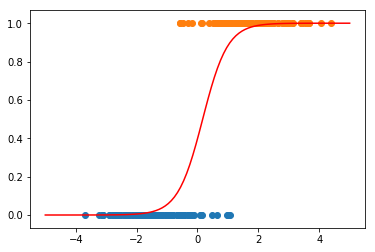

In [19]:
# both linx and prob must be 1D
plt.plot(linx, prob, color='red')
plt.scatter(x0, y0)
plt.scatter(x1, y1)

It seems that the logistic regression was optimized correctly. 

## One-neuron neural network

We're now going to redo the same exercise with the neural network classifier of scikit-learn. We use:

* no hidden layer
* a sigmoid (also called logistic) activation

scikit-learn will find out that we have a single input variable per example, and that we want to do **binary classification** (to classify in two categories). Therefore, it will create the neural network automatically with one neuron in the input layer and one neuron in the output layer. 

In [15]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(), 
                    alpha = 0.001,
                    activation='logistic', 
                    solver='lbfgs', random_state=1)

mlp.fit(x,y)

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

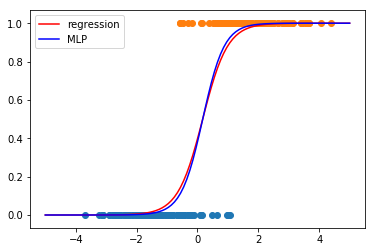

In [20]:
prob_mlp = mlp.predict_proba(linx)
# take the second probability 
# (to be in category 1) for each example
# and reshape it to a 1D array of size 100
prob_mlp = prob_mlp[:,1].reshape(len(linx))
plt.plot(linx, prob, color='red', label='regression')
plt.plot(linx, prob_mlp, color='blue', label='MLP')
plt.scatter(x0, y0)
plt.scatter(x1, y1)
plt.legend()

As expected, the results are very similar. The differences are certainly due to some of the operations performed under the hood by the MLPClassifier. 

Honestly I don't know what's going on in there and I don't want to dig inside.
Indeed, the [MLPClassifier interface](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) is too opaque to my taste, and we will mostly use [keras](https://thedatafrog.com/neural-network-keras/) to work with neural networks anyway. 

## What's next? 

In this post you have learnt: 

* what's inside a neuron, and in particular what is the sigmoid activation function;
* that the sigmoid activation is a natural choice for the neurons in the last layer of neural network dedicated to classification;
* that a neural network is nothing more than a function of its inputs;
* that neural networks with a single neuron do work, and are equivalent to a logistic regression.

Next time, we'll do the same exercise in 2D. We'll talk about the linearity of classification problems, and of the need to introduce non-linearities with hidden layers in some cases. 